In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sales-eda/train.csv


In [2]:
fr=pd.read_csv('/kaggle/input/black-friday-sales-eda/train.csv')
fr.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Check basic statistics of dataset

In [3]:
fr.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


Drop unnecessary fields

In [4]:
fr.drop(columns=['User_ID','Product_ID'],inplace=True)

Check datatype

In [5]:
fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


fill nan values

In [6]:
fr.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
fr=fr.fillna(0)

In [8]:
fr.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

check for unique values in data column by column

In [9]:
fr['Gender'].unique()

array(['F', 'M'], dtype=object)

Convert categorical data into integer using map function (e.g 'Gender' column)



In [10]:
fr['Gender']=fr['Gender'].map({'M':'1','F':'0'})

In [11]:
fr['Gender'].unique()

array(['0', '1'], dtype=object)

In [12]:
fr['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

map range variables into integers (e.g 'Age' column)

In [13]:
sorted_age = sorted(fr['Age'].unique()) # Sorting the Age's values into ascending order
dictionary = {}
def fun(x):
    global dictionary
    if x == '55+':
        dictionary.update({x: 55})
    else:
        split_x = x.split('-')
        dictionary.update( { x : (int(split_x[0]) + int(split_x[1])) / 2} )
    return dictionary

res = list(map(lambda x : fun(x), sorted_age))[-1]

In [14]:
fr['Age'] = fr['Age'].replace(res)

In [15]:
fr['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [16]:
fr['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [17]:
fr['City_Category']=fr['City_Category'].map({'A':'0','B':'1','C':'2'})

In [18]:
fr['City_Category'].unique()

array(['0', '2', '1'], dtype=object)

In [19]:
fr['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [20]:
fr['Stay_In_Current_City_Years']=fr['Stay_In_Current_City_Years'].str.replace("+","")

/tmp/ipykernel_20/979975073.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  fr['Stay_In_Current_City_Years']=fr['Stay_In_Current_City_Years'].str.replace("+","")


In [21]:
fr['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [22]:
fr['Marital_Status'].unique()

array([0, 1])

In [23]:
fr['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [24]:
fr['Product_Category_2'].unique()

array([ 0.,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [25]:
fr['Product_Category_2'].dtypes

dtype('float64')

In [26]:
fr['Product_Category_3'].unique()

array([ 0., 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [27]:
fr['Purchase'].unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613])

In [28]:
fr.shape

(550068, 10)

In [29]:
fr.drop_duplicates()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,8.5,10,0,2,0,3,0.0,0.0,8370
1,0,8.5,10,0,2,0,1,6.0,14.0,15200
2,0,8.5,10,0,2,0,12,0.0,0.0,1422
3,0,8.5,10,0,2,0,12,14.0,0.0,1057
4,1,55.0,16,2,4,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,53.0,13,1,1,1,20,0.0,0.0,368
550064,0,30.5,1,2,3,0,20,0.0,0.0,371
550065,0,30.5,15,1,4,1,20,0.0,0.0,137
550066,0,55.0,1,2,2,0,20,0.0,0.0,365


In [30]:
fr.shape

(550068, 10)

In [31]:
fr.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

**Data Visualisation**

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [33]:
fr['Product_Category_2']=fr['Product_Category_2'].astype(float)
fr['Product_Category_3']=fr['Product_Category_3'].astype(float)

Purchase Distribution

<Axes: xlabel='Purchase', ylabel='Count'>

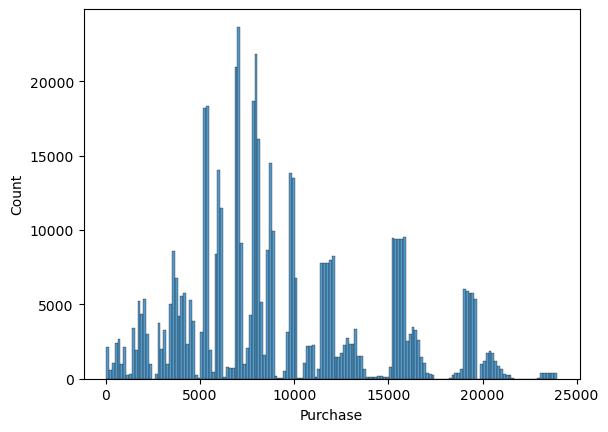

In [34]:
sns.histplot(x='Purchase',data=fr)

check for outliers

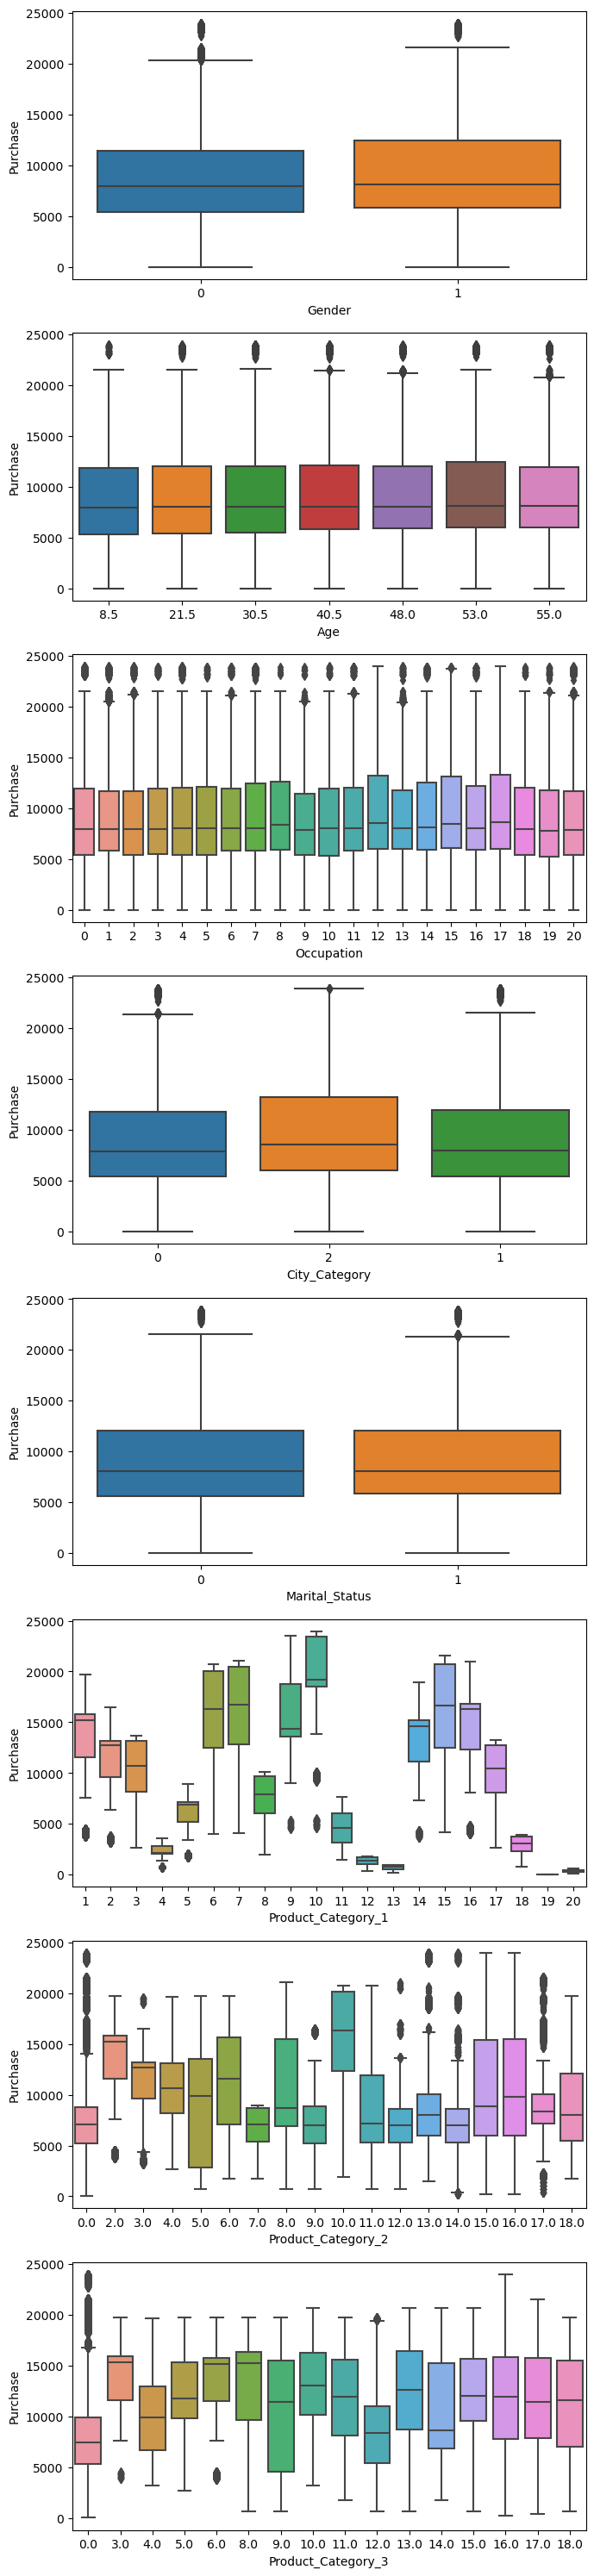

In [35]:
list1= ['Gender','Age','Occupation','City_Category','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']
fig,axes = plt.subplots(nrows=len(list1), ncols=1, figsize=(7,30)) 
for i,j in enumerate(list1):
    sns.boxplot(ax=axes[i],data= fr,x = j,y='Purchase')
plt.tight_layout()
        
# list1= ['Gender','Age','Occupation','City_Category','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']

Analysis by (Gender, Marital Status, occupation,  city) vs purchase 

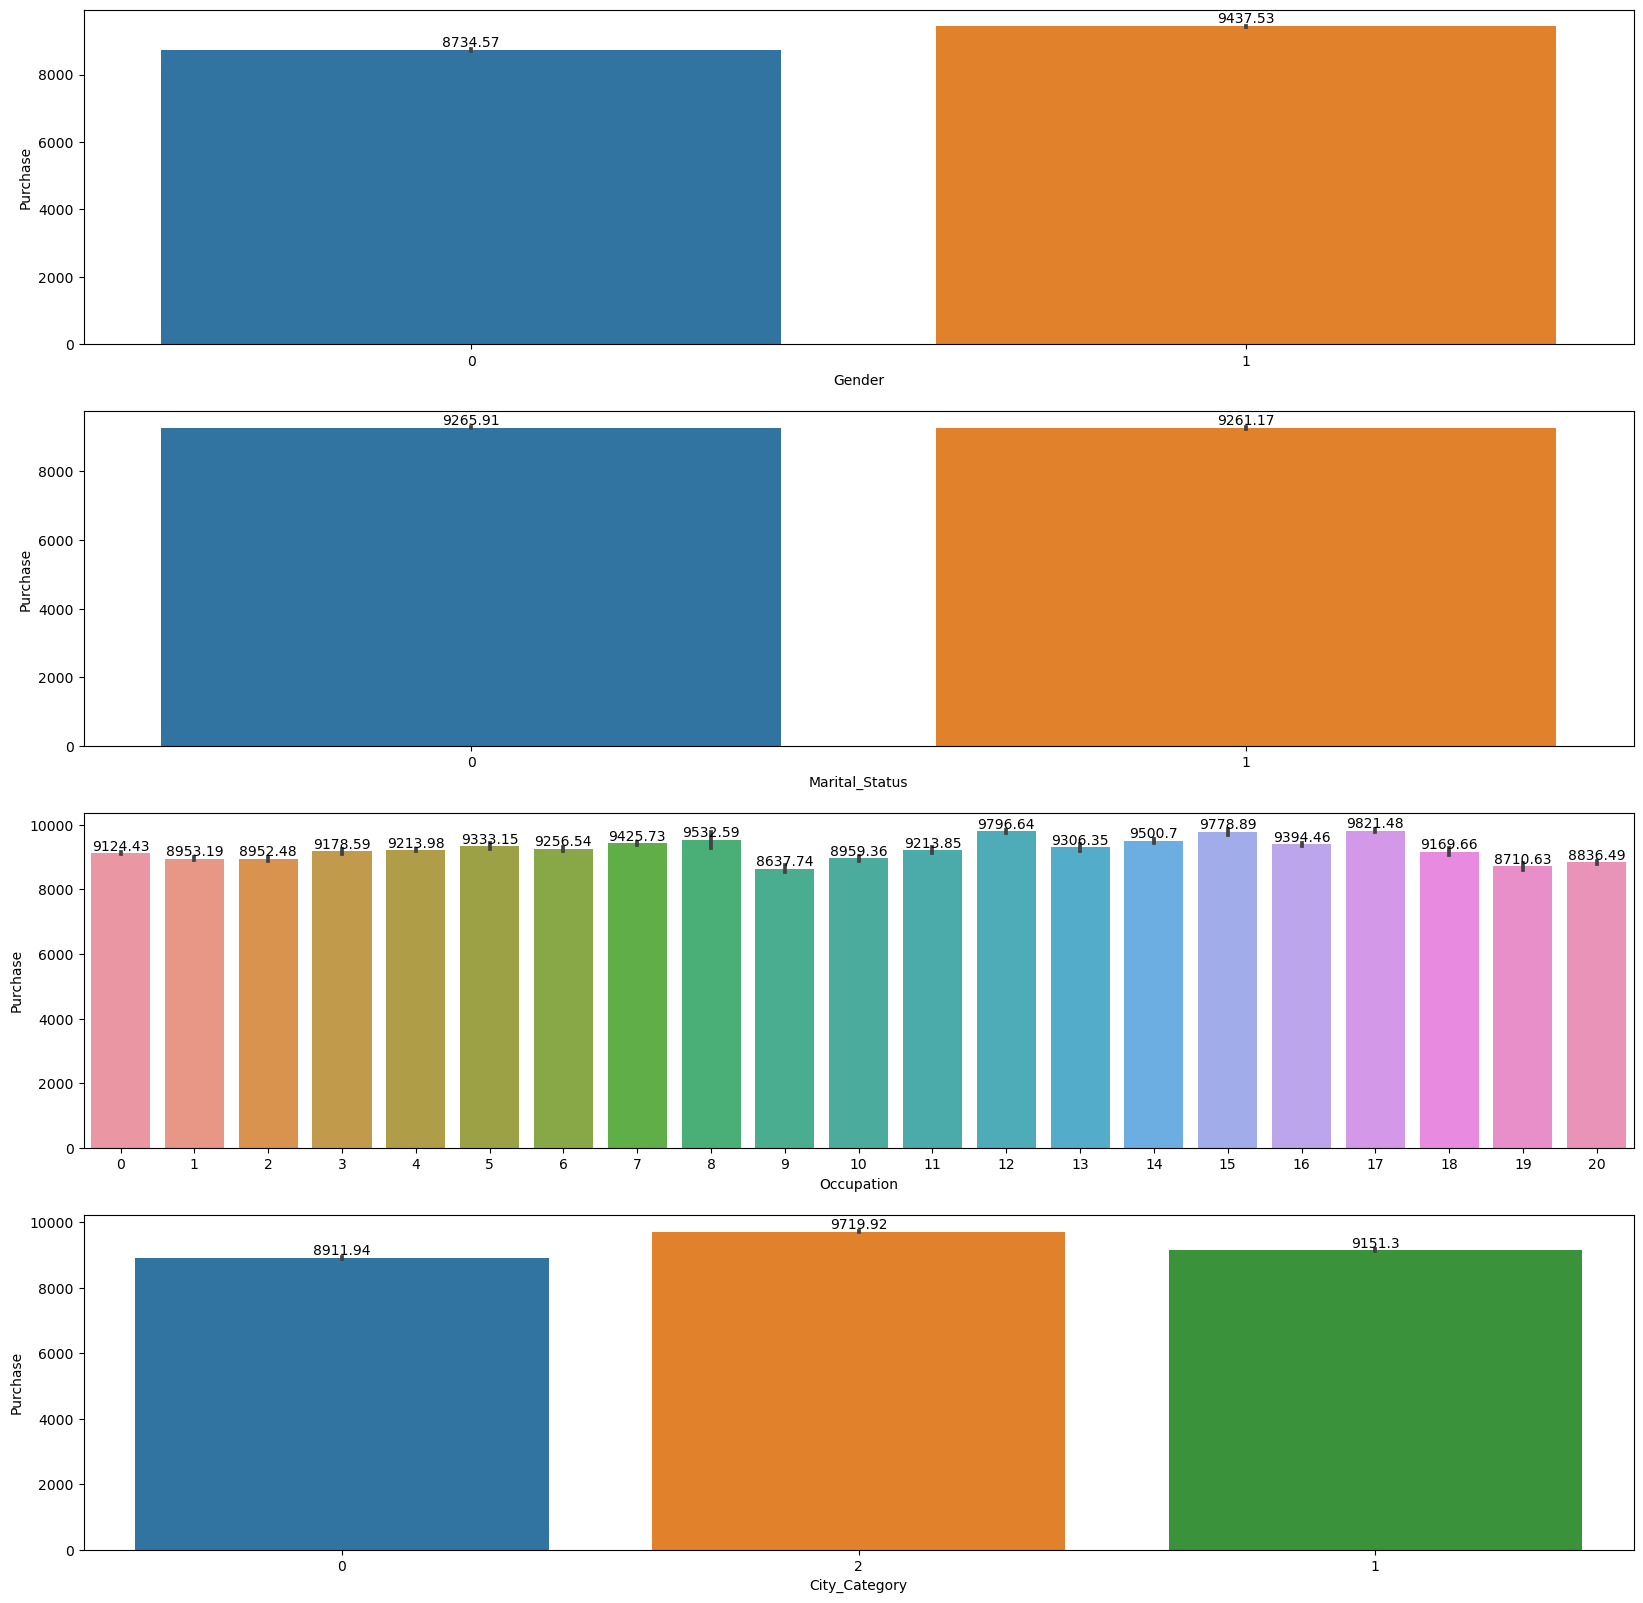

In [36]:
l1=['Gender','Marital_Status','Occupation','City_Category']
fid, axes=plt.subplots(nrows=len(l1),ncols=1,figsize=(20,20))

for i,j in enumerate(l1):
    s=sns.barplot(x=j,y='Purchase',data=fr,ax=axes[i])
    for i in s.containers:
        s.bar_label(i)
    plt.show

 purchase by city

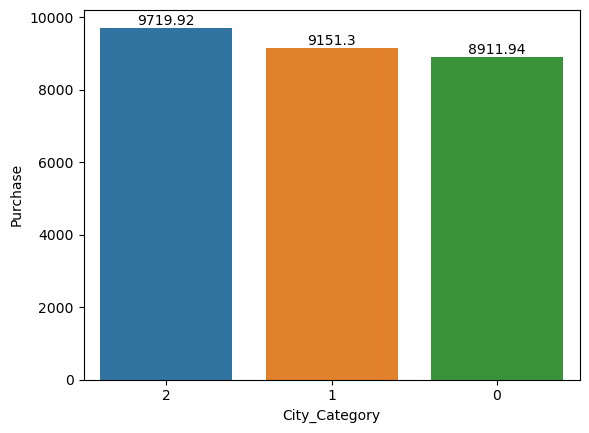

In [37]:
pc=fr.groupby('City_Category')[['Purchase']].mean().nlargest(10,['Purchase']).reset_index()
a=sns.barplot(x='City_Category',y='Purchase',data=pc)
for i in a.containers:
    a.bar_label(i)
plt.show()

purchase by age group

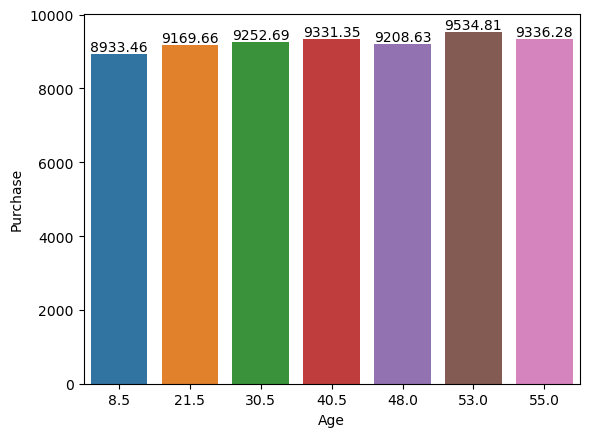

In [38]:
pa=fr.groupby('Age')[['Purchase']].mean().nlargest(10,['Purchase']).reset_index()
a=sns.barplot(x='Age',y='Purchase',data=pa)

for i in a.containers:
    a.bar_label(i)

plt.show()

visualize individul column

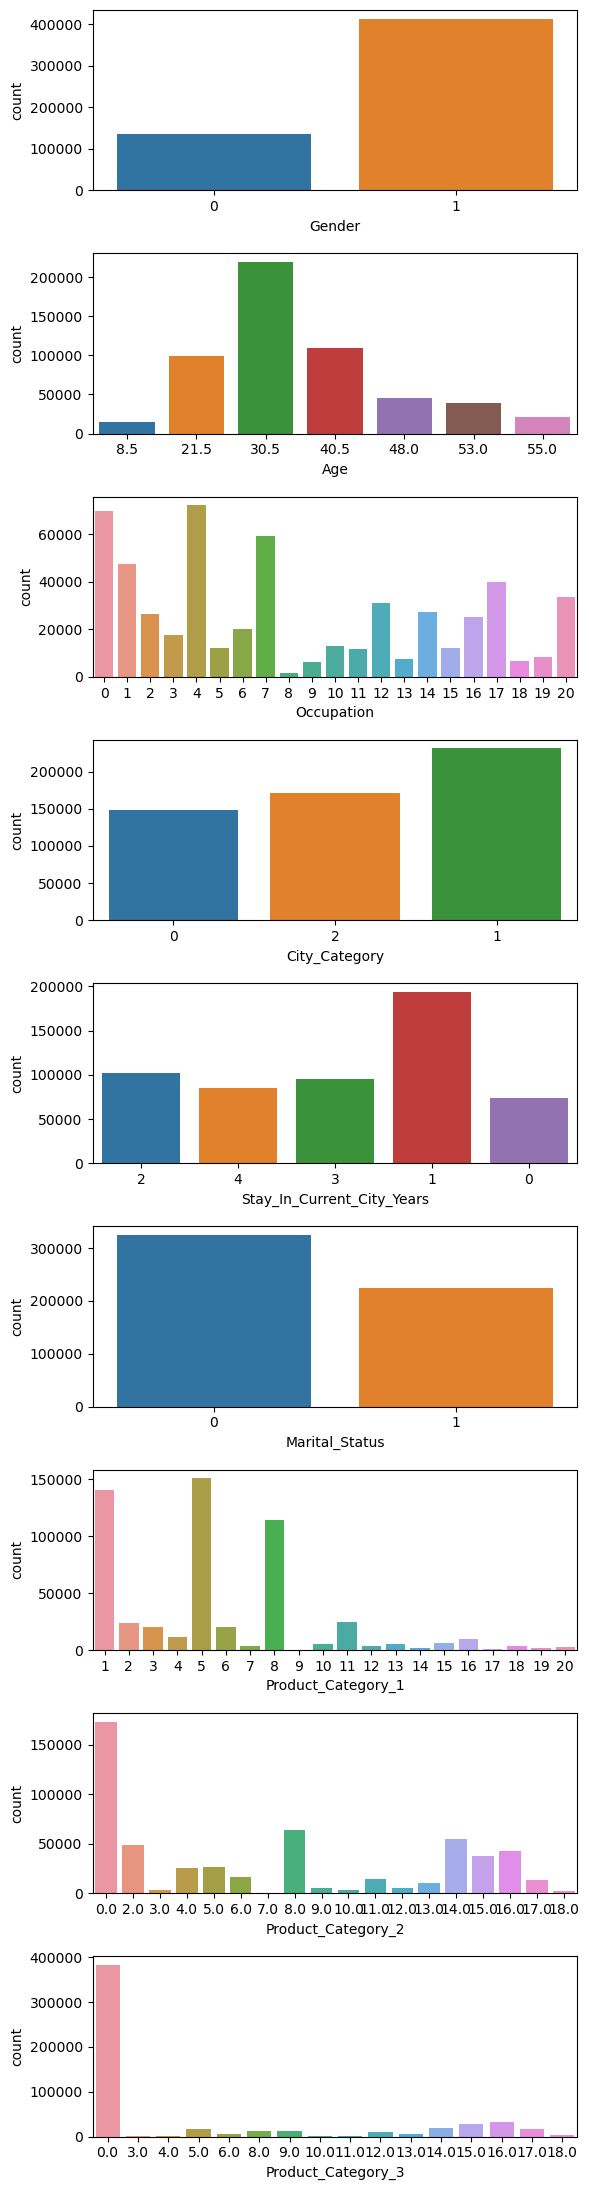

In [39]:
fig,axes=plt.subplots(nrows=9,ncols=1,figsize=(6,22))

sns.countplot(x='Gender',data=fr,ax=axes[0])
sns.countplot(x='Age',data=fr,ax=axes[1])
sns.countplot(x='Occupation',data=fr,ax=axes[2])
sns.countplot(x='City_Category',data=fr,ax=axes[3])
sns.countplot(x='Stay_In_Current_City_Years',data=fr,ax=axes[4])
sns.countplot(x='Marital_Status',data=fr,ax=axes[5])
sns.countplot(x='Product_Category_1',data=fr,ax=axes[6])
sns.countplot(x='Product_Category_2',data=fr,ax=axes[7])
sns.countplot(x='Product_Category_3',data=fr,ax=axes[8])


# sns.countplot(x='Purchase',data=fr,ax=axes[9])
plt.tight_layout()
# sns.countplot(x='Purchase',data=fr,ax=axes[9])

**Age vs Purchased**

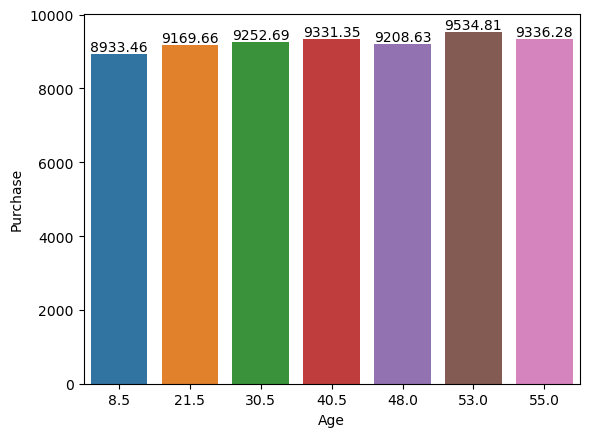

In [40]:
ap=fr.groupby('Age')[['Purchase']].mean().nlargest(10,['Purchase']).reset_index()
a=sns.barplot(x='Age',y='Purchase',data=ap)
for i in a.containers:
    a.bar_label(i)
plt.show()

**Occupation vs Purchased**

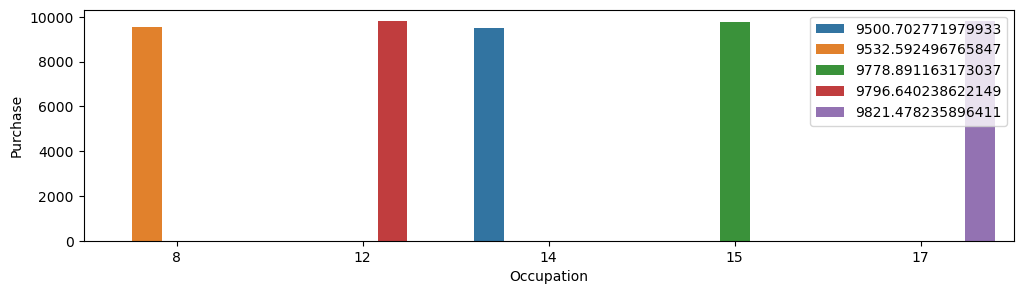

In [41]:
plt.figure(figsize=(12,3))
op=fr.groupby('Occupation')[['Purchase']].mean().nlargest(5,['Purchase']).reset_index()
sns.barplot(x='Occupation',y='Purchase',data=op,hue='Purchase')
plt.legend(loc='upper right')
# for i in z.containers:
#     z.bar_value(i)
# plt.show()

**Product_category_1 vs Purchased**

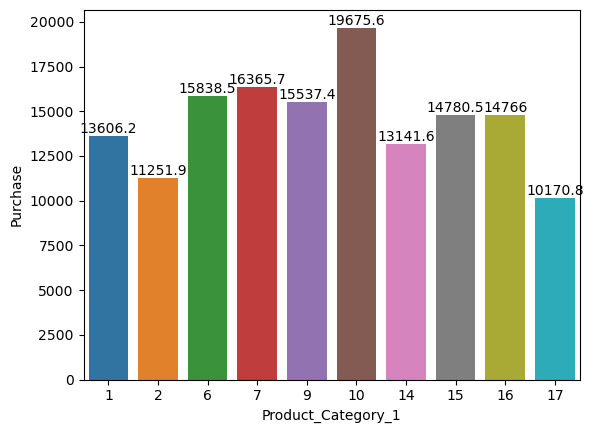

In [42]:
p1=fr.groupby('Product_Category_1')[['Purchase']].mean().nlargest(10,['Purchase']).reset_index()
a=sns.barplot(x='Product_Category_1',y='Purchase',data=p1)

for i in a.containers:
    a.bar_label(i)
plt.show()

**Product_category_2 vs Purchased**

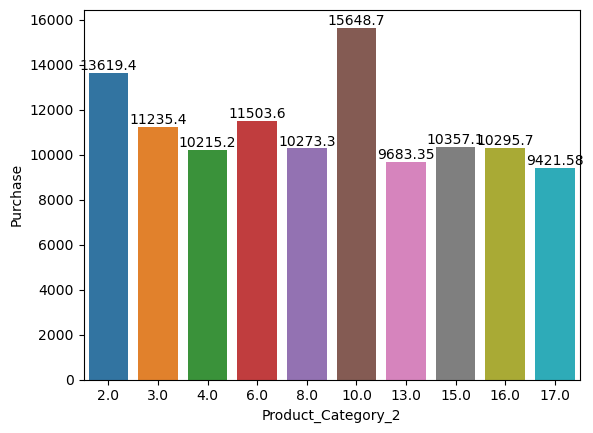

In [43]:
p2=fr.groupby('Product_Category_2')[['Purchase']].mean().nlargest(10,['Purchase']).reset_index()
a=sns.barplot(x='Product_Category_2',y='Purchase',data=p2)

for i in a.containers:
    a.bar_label(i)
plt.show()

**Product_category_3 vs Purchased**

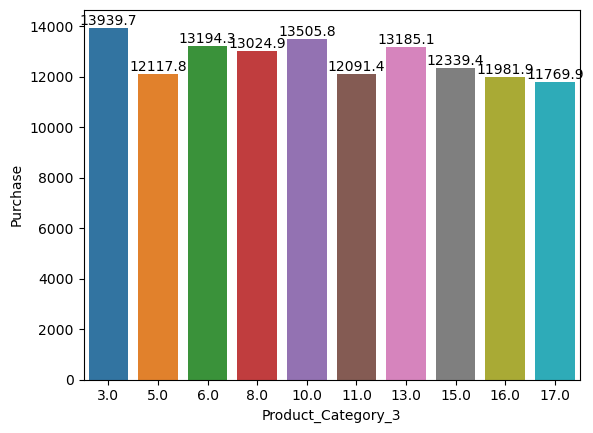

In [44]:
p3=fr.groupby('Product_Category_3')[['Purchase']].mean().nlargest(10,['Purchase']).reset_index()
a=sns.barplot(x='Product_Category_3',y='Purchase',data=p3)

for i in a.containers:
    a.bar_label(i)
plt.show()

**City category pie chart**

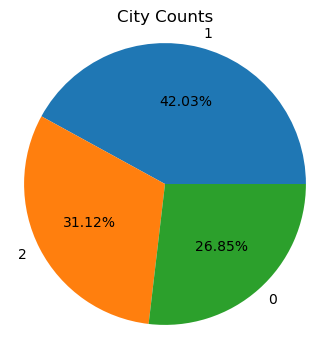

In [45]:
city_counts = fr['City_Category'].value_counts()

plt.figure(figsize=(4,4))  

plt.pie(city_counts, labels=city_counts.index, autopct='%1.2f%%')
plt.title('City Counts')
plt.axis('equal') 
plt.show()
